In [1]:
from libs import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def getdata():
    url = "http://data.gov.in/sites/default/files/dataurl14032019/RS_Session_246_AU459_1.3.csv"
    df = pd.read_csv('./data/zone-wise-punctuality-sf.csv')

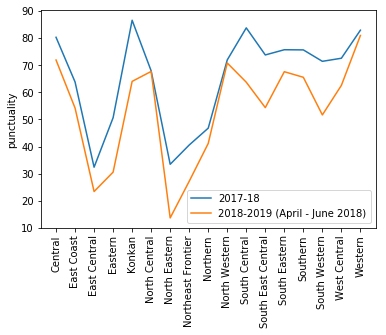

In [4]:
def plot(df):
    plt.plot(df['Zone'],list(zip(df['2017-18'],df['2018-2019 (April - June 2018)'])))
    plt.xticks(rotation=90)
    plt.ylabel('punctuality')
    plt.legend(df.columns.to_list()[1:])
    plt.show()
    plt.close()